In [9]:
#droping the null values and storing it on a new data frame
data_clean = data.dropna()
print(data_clean.isnull().sum())


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler



#enable horizantal scrolling
pd.set_option('display.width', None) 
pd.set_option('display.max_columns', None)

data = pd.read_csv(r"./data/housing.csv")
data.head(10)
        

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [33]:
# checking to see if we have any null values
data.info()
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity  

In [18]:
# removing the median_house_value and set the x
# by setting axis=1, you're telling pandas to look for 'median_house_value' among the column labels and remove that entire column from the DataFrame.
x = data_clean.drop(['median_house_value'], axis=1)
y = data_clean['median_house_value']
# now we gonna select the test data so we can then evaluate our model
#notice we spliting the ther test data size to be 20% aka 0.2
x_training, x_test, y_training, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
training_data = x_training.join(y_training)   
training_data.head(10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,NEAR BAY,261100.0
9685,-121.63,36.71,19.0,5015.0,1013.0,3251.0,940.0,3.9818,<1H OCEAN,152900.0
5012,-118.33,34.01,44.0,1762.0,463.0,786.0,445.0,1.9231,<1H OCEAN,188500.0
9103,-117.96,34.53,10.0,2907.0,559.0,1681.0,531.0,3.8594,INLAND,141000.0
511,-122.22,37.82,42.0,2991.0,335.0,1018.0,335.0,13.4990,NEAR BAY,500001.0
13900,-116.51,34.45,21.0,8502.0,2634.0,2330.0,991.0,1.3811,INLAND,51300.0
14310,-117.14,32.71,43.0,966.0,255.0,857.0,208.0,1.2841,NEAR OCEAN,72000.0
2280,-119.79,36.79,26.0,1700.0,423.0,909.0,386.0,2.2560,INLAND,64500.0
1343,-121.89,38.01,32.0,1000.0,188.0,663.0,212.0,4.0972,INLAND,99200.0
4118,-118.22,34.14,52.0,1388.0,271.0,735.0,239.0,3.7404,<1H OCEAN,247700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

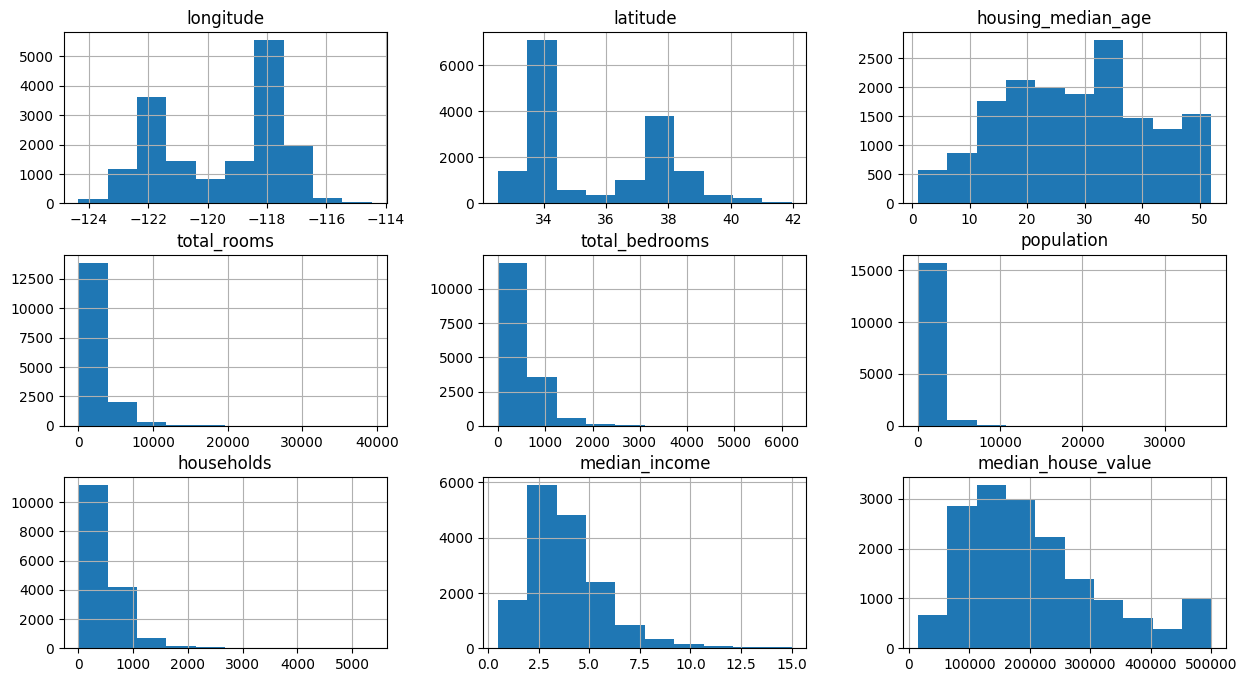

In [22]:
training_data.hist(figsize=(15,8))

In [26]:
#correlation 
#Each cell shows the correlation coefficient between the feature in that row and the feature in that column.
#Correlation values range from -1 to 1:
# 1 indicates a perfect positive correlation.
# -1 indicates a perfect negative correlation.
# 0 indicates no linear correlation.

training_data.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924820,-0.111532,0.046710,0.068851,0.101811,0.056201,-0.012658,-0.044596
latitude,-0.924820,1.000000,0.015598,-0.037910,-0.066231,-0.109949,-0.071077,-0.083265,-0.144598
housing_median_age,-0.111532,0.015598,1.000000,-0.362366,-0.324104,-0.299376,-0.307469,-0.113938,0.108381
total_rooms,0.046710,-0.037910,-0.362366,1.000000,0.931594,0.859773,0.919951,0.196737,0.129707
total_bedrooms,0.068851,-0.066231,-0.324104,0.931594,1.000000,0.878531,0.979636,-0.006546,0.045534
population,0.101811,-0.109949,-0.299376,0.859773,0.878531,1.000000,0.908153,0.008697,-0.026125
households,0.056201,-0.071077,-0.307469,0.919951,0.979636,0.908153,1.000000,0.014342,0.060244
median_income,-0.012658,-0.083265,-0.113938,0.196737,-0.006546,0.008697,0.014342,1.000000,0.690833
median_house_value,-0.044596,-0.144598,0.108381,0.129707,0.045534,-0.026125,0.060244,0.690833,1.000000


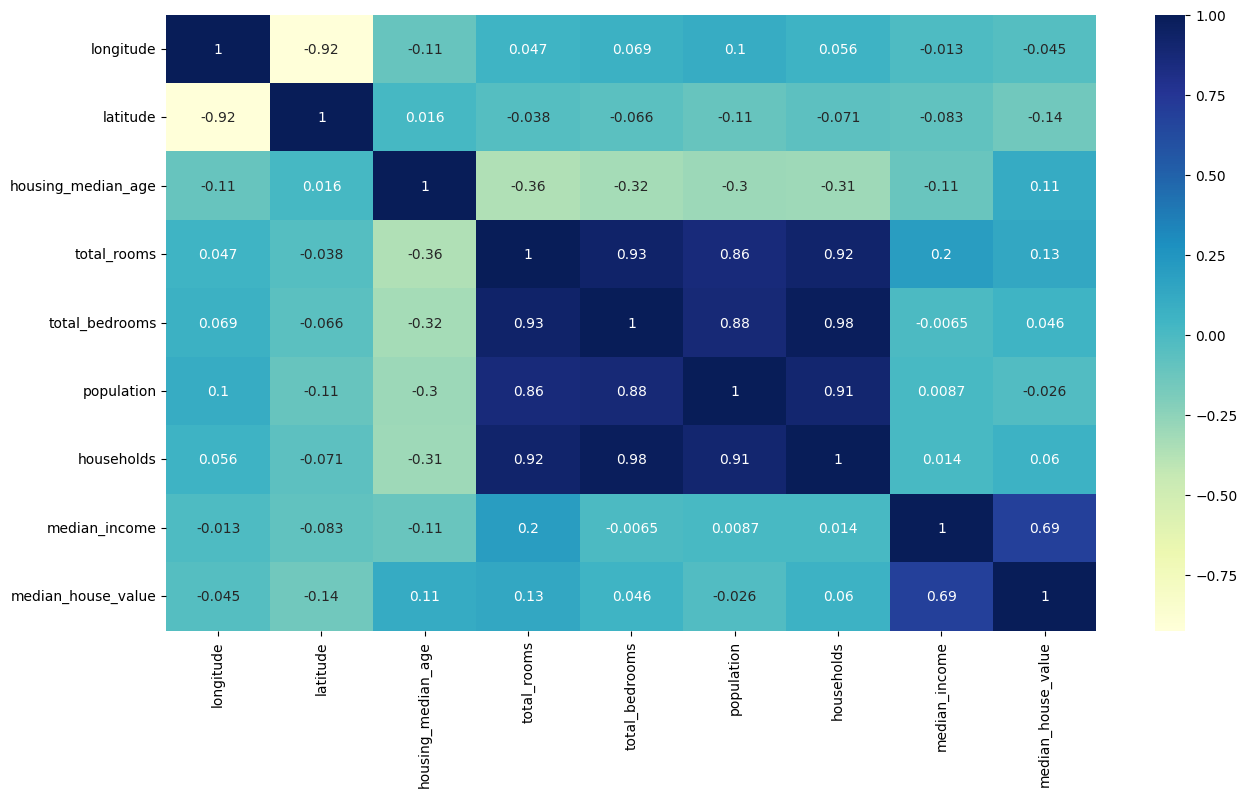

In [36]:
plt.figure(figsize=(15, 8))
#YlGnBu yellow, green and blue 
sns.heatmap(training_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.show()

In [39]:
'''
np.log() applies the natural logarithm (base e) transformation to the values in each column.
-Why this is done:
Handle skewed data → Many real-world features (like rooms, population, households) have right-skewed distributions with a long tail (a few very large values). Taking the log compresses large values and makes the distribution more normal-like.
Reduce the impact of outliers → Extremely large values won’t dominate the model after log-scaling.
Stabilize variance → Makes relationships between variables more linear, which helps linear regression and other algorithms.
Numerical stability → Adding +1 ensures we don’t try to compute log(0), which is undefined.
'''
training_data['total_rooms']=np.log(training_data['total_rooms']+1)
training_data['total_bedrooms']=np.log(training_data['total_bedrooms']+1)
training_data['population']=np.log(training_data['population']+1)
training_data['households']=np.log(training_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

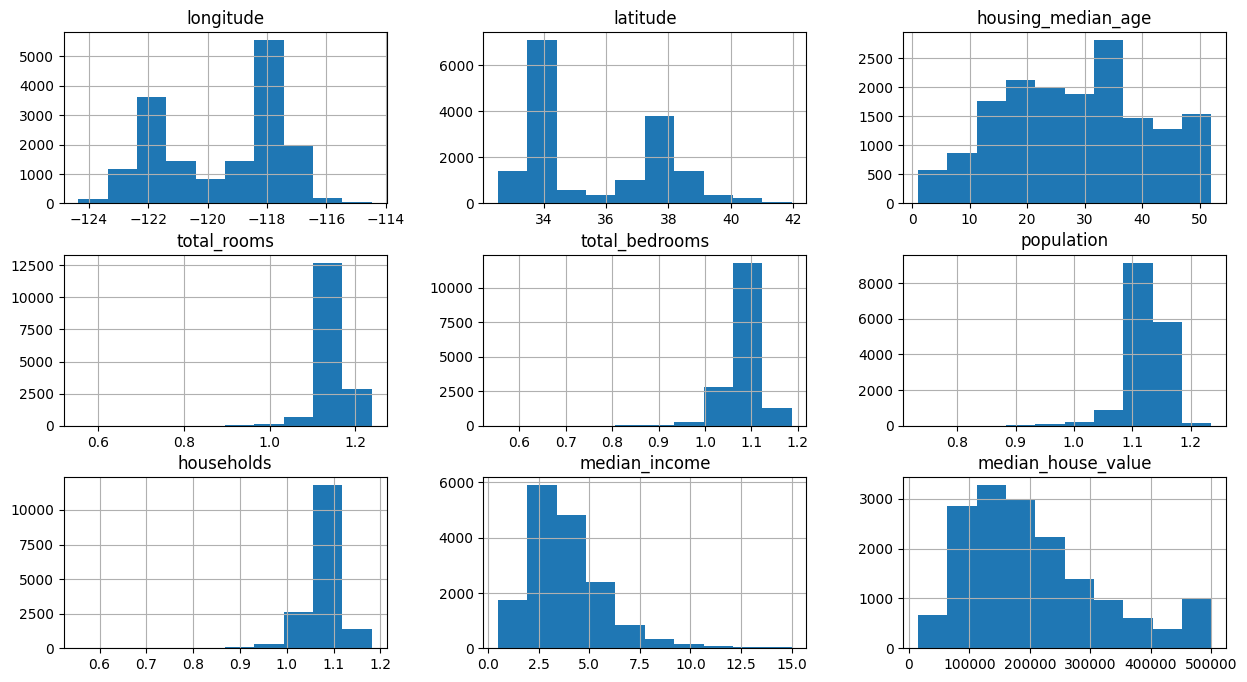

In [40]:
training_data.hist(figsize=(15,8))

In [41]:
training_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7207
INLAND        5190
NEAR OCEAN    2106
NEAR BAY      1838
ISLAND           5
Name: count, dtype: int64

In [52]:
# Create dummy variables for ocean_proximity
training_data['ocean_proximity']

9          NEAR BAY
9685      <1H OCEAN
5012      <1H OCEAN
9103         INLAND
511        NEAR BAY
            ...    
17510     <1H OCEAN
6074      <1H OCEAN
8138      <1H OCEAN
18969        INLAND
14242    NEAR OCEAN
Name: ocean_proximity, Length: 16346, dtype: object

In [53]:
# Create dummy variables for ocean_proximity 
# problem we have string instead of number, soltion we need to encode it using get_dummies
#notice For each unique category, it creates a new binary column in the DataFrame (1H OCEAN	INLAND	ISLAND	NEAR BAY	NEAR OCEAN)
dummies = pd.get_dummies(training_data.ocean_proximity).astype(int)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9,0,0,0,1,0
9685,1,0,0,0,0
5012,1,0,0,0,0
9103,0,1,0,0,0
511,0,0,0,1,0
...,...,...,...,...,...
17510,1,0,0,0,0
6074,1,0,0,0,0
8138,1,0,0,0,0
18969,0,1,0,0,0


In [56]:
#next step since we encoded the values now we need to drop the ocean_proximity and join the encoded data to our training data
training_data=training_data.join(dummies).drop(['ocean_proximity'], axis=1)
training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9,-122.25,37.84,52.0,1.168278,1.106314,1.138454,1.106744,3.6912,261100.0,0,0,0,1,0
9685,-121.63,36.71,19.0,1.179712,1.121547,1.165288,1.118455,3.9818,152900.0,1,0,0,0,0
5012,-118.33,34.01,44.0,1.143297,1.087112,1.110898,1.085236,1.9231,188500.0,1,0,0,0,0
9103,-117.96,34.53,10.0,1.161420,1.095840,1.141521,1.093489,3.8594,141000.0,0,1,0,0,0
511,-122.22,37.82,42.0,1.162412,1.071390,1.121750,1.071390,13.4990,500001.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17510,-121.92,37.34,35.0,1.074557,1.014191,1.077241,1.001987,3.0139,204200.0,1,0,0,0,0
6074,-117.86,34.08,31.0,1.156443,1.073433,1.121140,1.072570,7.5196,380900.0,1,0,0,0,0
8138,-118.10,33.83,36.0,1.134716,1.056300,1.106004,1.056512,4.8750,222500.0,1,0,0,0,0
18969,-122.02,38.26,20.0,1.171443,1.109622,1.151469,1.110514,3.2061,120400.0,0,1,0,0,0


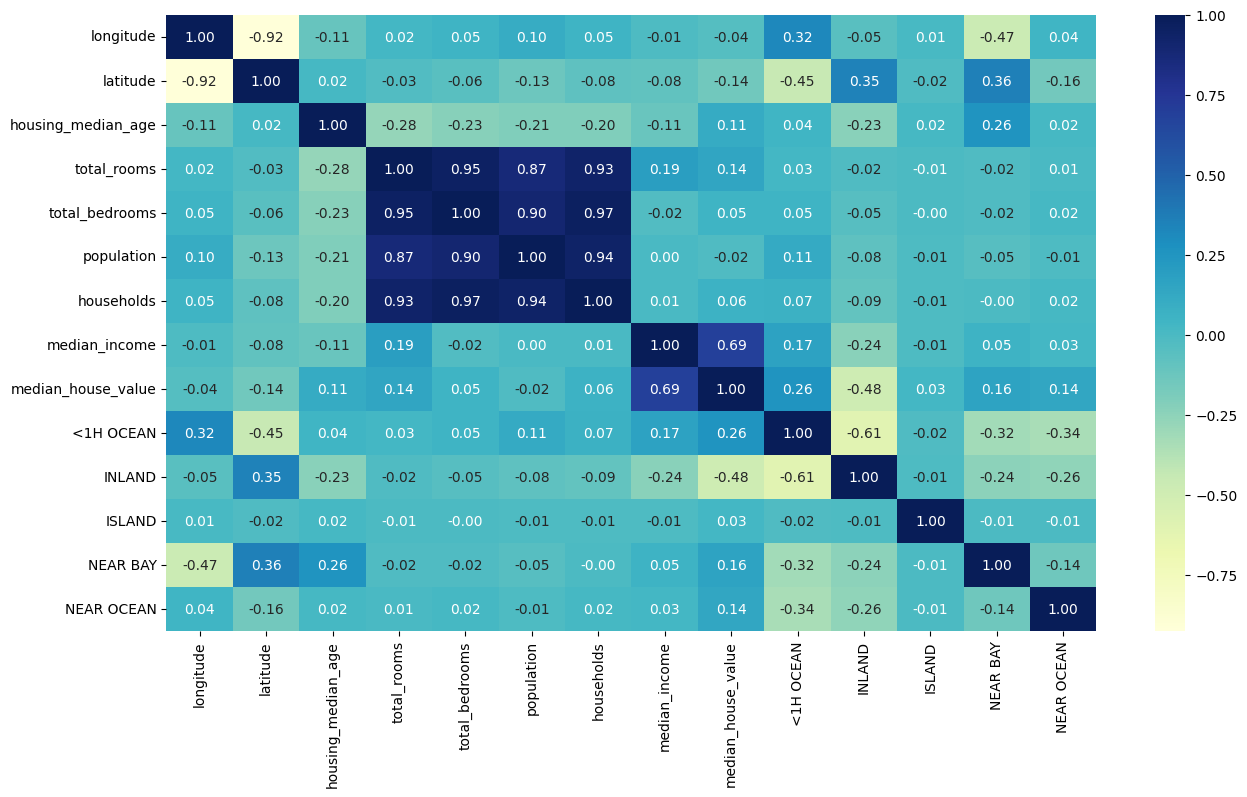

In [57]:
plt.figure(figsize=(15, 8))
sns.heatmap(training_data.corr(), annot=True, fmt=".2f", cmap='YlGnBu')
plt.show()

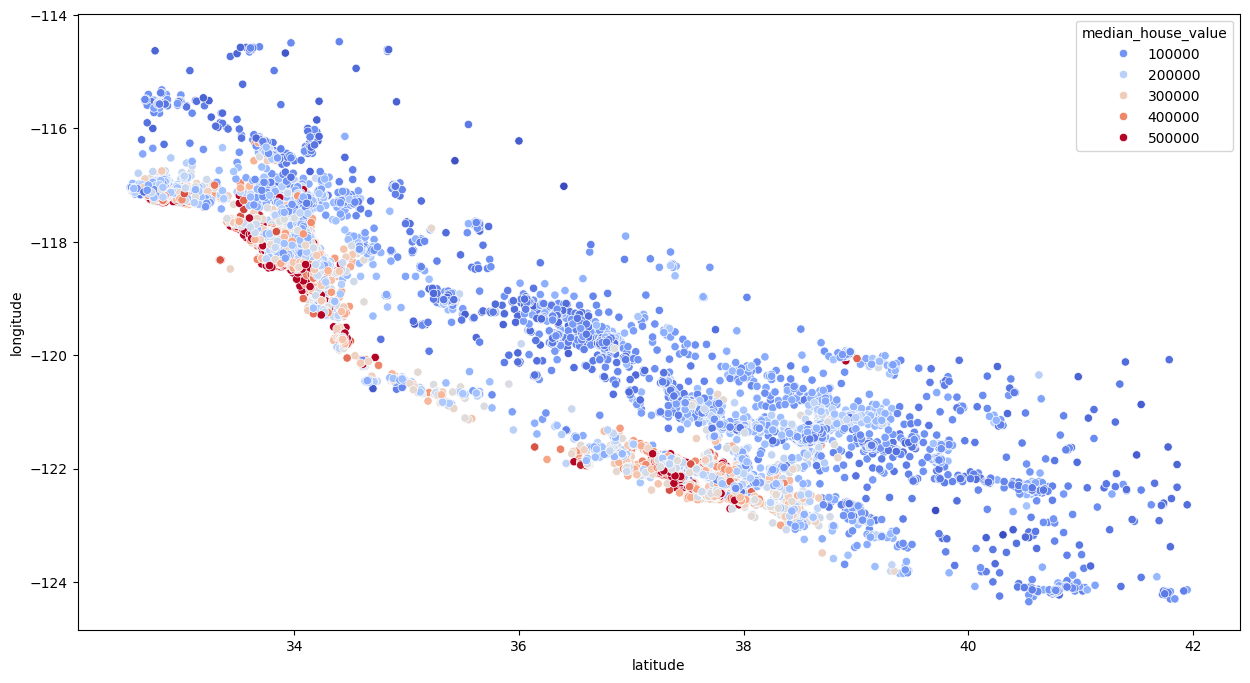

In [59]:
plt.figure(figsize=(15, 8))
#cool warm
sns.scatterplot(x="latitude", y="longitude", data=training_data, hue="median_house_value", palette="coolwarm")
plt.show()

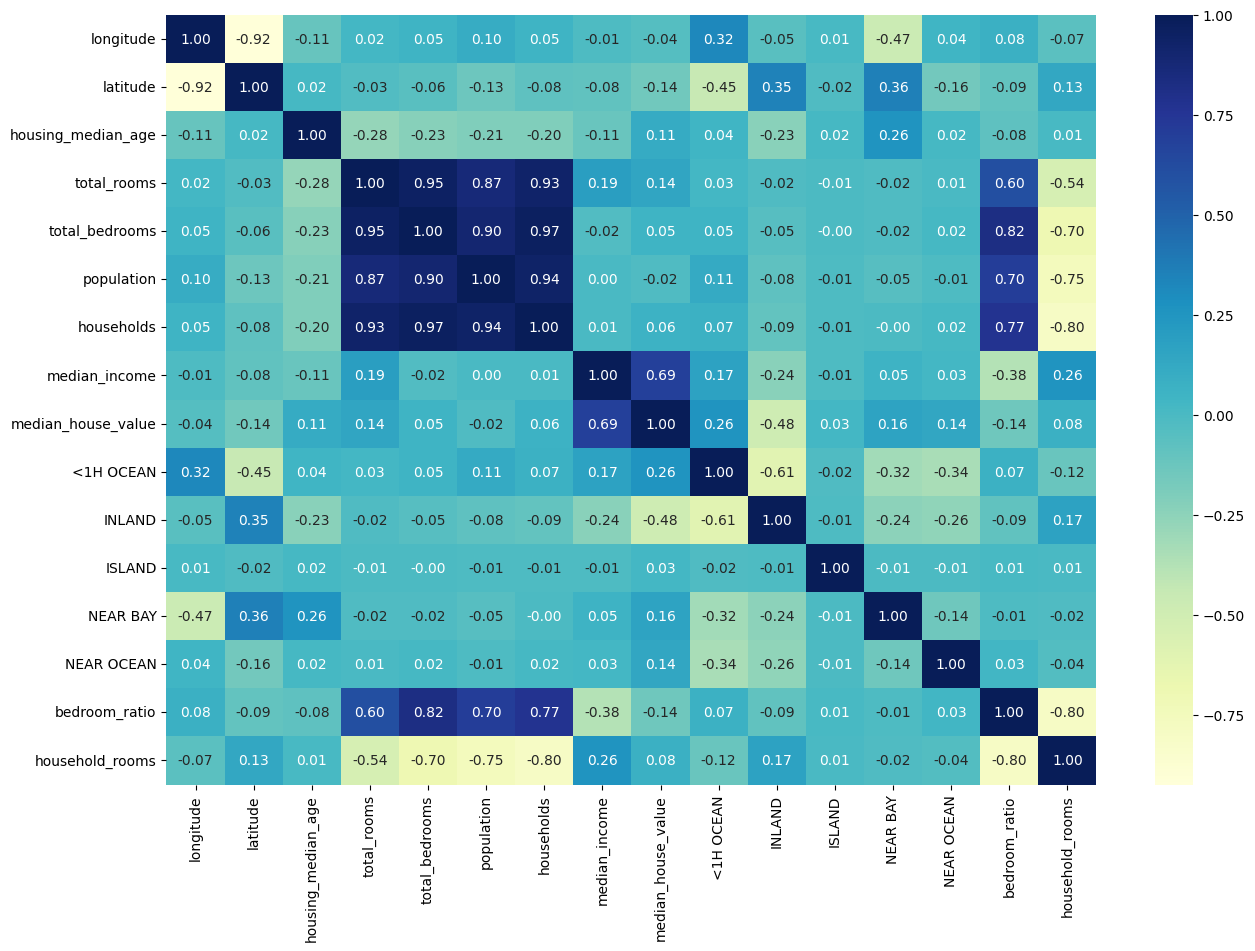

In [62]:
#The idea is that while "total rooms" and "total bedrooms" are individual features, their ratio might better indicate the type or functionality of #properties within a block (e.g., more bedrooms per room might suggest smaller, more compact living spaces or a different kind of dwelling).
#The video suggests that "total rooms" alone doesn't give the full picture if a block has many households . This new feature helps understand if the rooms # # are spread out among many small households or concentrated in fewer, larger ones, which could influence house values.

training_data['bedroom_ratio'] = training_data['total_bedrooms'] / training_data['total_rooms']
training_data['household_rooms'] = training_data['total_rooms'] / training_data['households']
plt.figure(figsize=(15, 10))
sns.heatmap(training_data.corr(), annot=True, fmt=".2f", cmap='YlGnBu')
plt.show()

In [108]:
test_data = x_test.join(y_test)

# Apply log transforms
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

# Dummy encode ocean_proximity (make sure column exists here)
if 'ocean_proximity' in test_data.columns:
    test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'], drop_first=True))
    test_data = test_data.drop(['ocean_proximity'], axis=1)

# Feature engineering
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']